<a href="https://colab.research.google.com/github/BKnightHD/Machine-Learning-w-Scikit-Learn-TensorFlow/blob/main/MINIST_Neural_Netwrk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

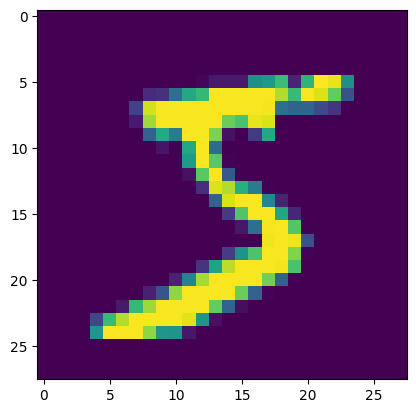

In [8]:
plt.imshow(X_train[0])

In [9]:
y_train[0]

5

In [10]:
X_train=X_train/255
X_test=X_test/255

In [11]:
X_train[0]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the input and output dimensions
input_dims = X_train.shape[1]
output_dims = 10

# Defining the sequential model
model = Sequential()

# Add the 1st dense layer to the sequential model
model.add(Dense(512, activation="sigmoid", input_shape=(input_dims,), name="Hidden_layer_1"))

# Add the 2nd dense layer to the sequential model
model.add(Dense(128, activation="sigmoid", name="Hidden_layer_2"))

# Add the output layer
model.add(Dense(output_dims, activation="softmax", name="output_layer"))

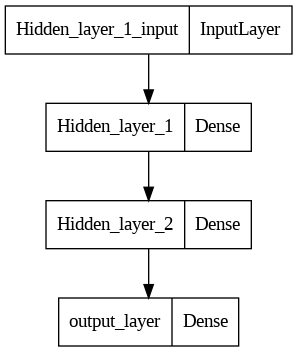

In [15]:
from tensorflow.keras.utils import plot_model
plot_model(model)

#Compile a Neural netowrk

In [16]:
from tensorflow.keras.optimizers import RMSprop
#define the optimizer
optimizer=RMSprop(0.001)
#complile the model
model.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=["accuracy"])

In [18]:
#define the batch_size and no. of epochs
batch_size=128 #batch size should always be in 2^n where n=1,2,3,4....
num_epochs=20

#fit a neural network or train a neural_network
from keras.utils import to_categorical

# Assuming y_train is a 1D array of integer labels
y_train_one_hot = to_categorical(y_train, num_classes=output_dims)

# Now y_train_one_hot should have shape (batch_size, output_dims)

# Compile your model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train your model
history = model.fit(X_train, y_train_one_hot, validation_split=0.2, epochs=num_epochs, batch_size=batch_size, verbose=1)

Epoch 1/20
375/375 [==============================] - 6s 14ms/step - loss: 0.6012 - accuracy: 0.8444 - val_loss: 0.2750 - val_accuracy: 0.9186
Epoch 2/20
375/375 [==============================] - 6s 15ms/step - loss: 0.2474 - accuracy: 0.9279 - val_loss: 0.2066 - val_accuracy: 0.9401
Epoch 3/20
375/375 [==============================] - 6s 17ms/step - loss: 0.1876 - accuracy: 0.9447 - val_loss: 0.1656 - val_accuracy: 0.9535
Epoch 4/20
375/375 [==============================] - 5s 14ms/step - loss: 0.1481 - accuracy: 0.9562 - val_loss: 0.1393 - val_accuracy: 0.9604
Epoch 5/20
375/375 [==============================] - 7s 19ms/step - loss: 0.1196 - accuracy: 0.9642 - val_loss: 0.1263 - val_accuracy: 0.9629
Epoch 6/20
375/375 [==============================] - 5s 13ms/step - loss: 0.0971 - accuracy: 0.9720 - val_loss: 0.1219 - val_accuracy: 0.9639
Epoch 7/20
375/375 [==============================] - 6s 16ms/step - loss: 0.0803 - accuracy: 0.9767 - val_loss: 0.0974 - val_accuracy: 0.9711